<a href="https://colab.research.google.com/github/SeunghyeChae/CAKD3_tmdhey/blob/main/%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets)= boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
train_targets.shape

(404,)

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

테스트 데이터를 정규화 시 사용한 값이 훈련 데이터에서 계산한 값임을 유의

In [ ]:
from keras import models
from keras import layers

def build_model():
  model= models.Sequential()
  model.add(layers.Dense(64, activation='relu',  # 아웃풋 64 
                         input_shape=(train_data.shape[1],))) # 열쪽을 선택 
  model.add(layers.Dense(64, activation='relu' ))
  model.add(layers.Dense(1))  # 이진분류가 아니라 회귀 --> 출력값 1? 
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [ ]:
import numpy as np

k=4
num_val_samples= len(train_data)//k  # 몫 
num_epochs= 100
all_scores =[]  # 교차검증하면 각각 구한걸 평균내야함 --> 최종 결과값  :: 각각의 구한 값 넣어주는 리스트

# k fold 

for i in range(k):
  print('처리중인 폴드 #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]  # :  검증데이터 준비: k번째 분할 
                                          # 0 ~ 101     : 1~102?
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(  # 훈련데이터 준비: 다른 분할 전체     
                                      # 검증용 데이터 빼고 나머지 다 여기로 들어감
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1)* num_val_samples:]],
       axis=0)
  
  model = build_model()  # 케라스 모델 구성 (컴파일 포함)
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size= 1, verbose=0)  # 모델 훈련 verbose=0 이므로 훈련 과정 출력 X 
  val_mse, val_mae = model.evaluate(val_data ,val_targets, verbose=0)  # val_targets: 검증 세트로 모델 평가 
  all_scores.append(val_mae) # 리스트에 넣어주기
  


처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
all_scores

[2.163065195083618, 2.4957118034362793, 2.524825096130371, 2.4121253490448]

In [ ]:
np.mean(all_scores)

2.398931860923767

In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 14.2140 - mae: 2.5263


In [ ]:
test_mae_score

2.526310443878174

In [ ]:
num_epoch = 500
all_mae_histories= []

# k fold 

for i in range(k):
  print('처리중인 폴드 #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]  # :  검증데이터 준비: k번째 분할 
                                          # 0 ~ 101     : 1~102?
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(  # 훈련데이터 준비: 다른 분할 전체     
                                      # 검증용 데이터 빼고 나머지 다 여기로 들어감
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1)* num_val_samples:]],
       axis=0)
  
  model = build_model()  # 케라스 모델 구성 (컴파일 포함)
  history= model.fit(partial_train_data, partial_train_targets,
                     validation_data = (val_data,val_targets),
                     epochs=num_epochs, batch_size= 1, verbose=0)  # 모델 훈련 verbose=0 이므로 훈련 과정 출력 X 
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history) # 리스트에 넣어주기

  

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
average_mae_history = [
                       np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

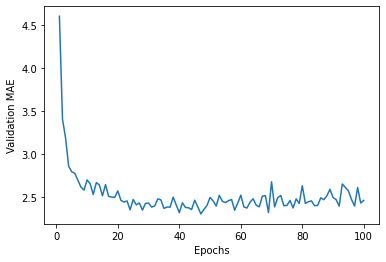

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

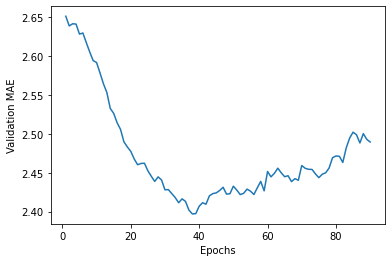

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points =[]
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points


smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()